<a href="https://colab.research.google.com/github/Jimmy-Rais/Cognifyz-Machine-Learning-Internship/blob/main/Neural_net_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pandas as pd
from keras import initializers
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data() #Train test split
#Normilize the input
x_train_full=x_train_full/255.0
x_test=x_test/255.0
#Validation set
x_dev,x_train=x_train_full[:5000],x_train_full[5000:]
y_dev,y_train=y_train_full[:5000],y_train_full[5000:]

4422102/4422102 [==============================] - 0s 0us/step


In [26]:
class NN:
  def __init__(self,x_train,y_train,x_test,y_test,x_dev,y_dev):
    self.x_train=x_train
    self.y_train=y_train
    self.x_test=x_test
    self.y_test=y_test
    self.x_dev=x_dev
    self.y_dev=y_dev
  def EDA(self):
    #Assign labels to categories
    class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
      "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
    #Display training data with its category
    plt.figure(figsize=(3,3))
    plt.imshow(x_train[50],cmap='gray')
    print("The image above represents a {}".format(class_names[y_train[50]]))
    #Return the size and data type of the training data
    print("The training set is of size {}".format(x_train.shape))
    print("This means that the training set has {} images /n and each item is a {}x{} pixels image".
          format(x_train.shape[0],x_train.shape[1],x_train.shape[2]))
    print("The dev set is of size {}/n and the test set is {}".format(x_dev.shape,x_test.shape))
  def NN_train(self,hidden_layers,neurons_per_layers,optimizer):
     self.hidden_layers=hidden_layers,
     self.neurons_per_layers=neurons_per_layers
     self.optimizer=optimizer
     #Custom  weights and bias initialization
     model=keras.Sequential()
     model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #Input layer to avoid shape mismatch
     for i in range(hidden_layers):
        model.add(Dense(neurons_per_layers,activation='relu')) #Hidden layers
        model.add(keras.layers.BatchNormalization()),#Batch Normalization
        model.add(keras.layers.Dropout(0.1)) #Dropout
     model.add(Dense(10,activation='softmax')) #Output layer
     #Investigate weights *
     model.summary()
    # a=model.layers[2]
    # weights,biases=a.get_weights()
   #  print("W {}".format(weights))
    # print("B {}".format(biases))
    #Model training
     model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
     history=model.fit(x_train,y_train,epochs=10,validation_data=(x_dev,y_dev),batch_size=128)
    #Training loss vs validation loss
     pd.DataFrame(history.history).plot(figsize=(8, 5))
     plt.grid(True)
     plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
     plt.show()
     return history
  def model_params(self):
    pass


The image above represents a Pullover
The training set is of size (55000, 28, 28)
This means that the training set has 55000 images /n and each item is a 28x28 pixels image
The dev set is of size (5000, 28, 28)/n and the test set is (10000, 28, 28)


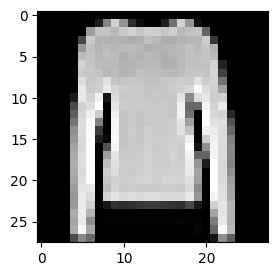

In [27]:
#Test_block
test=NN(x_train,y_train,x_test,y_test,x_dev,y_dev)
test.EDA()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 100)               78500     
                                                                 
 batch_normalization_14 (Ba  (None, 100)               400       
 tchNormalization)                                               
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_25 (Dense)            (None, 100)               10100     
                                                                 
 batch_normalization_15 (Ba  (None, 100)               400       
 tchNormalization)                                    

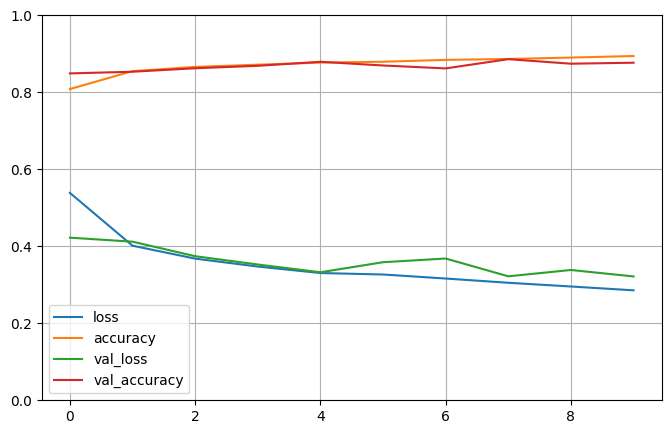

In [28]:
test.NN_train(2,100,Adam(learning_rate=0.001))